# ** Predicting Car Selling Price**

-------------

## **Objective**

The objective of this project is to develop a machine learning model that accurately predicts the selling price of cars based on attributes such as brand, model, year, seller type, ownership history, and mileage driven. This aims to optimize pricing strategies, enhance decision-making for buyers and sellers, and demonstrate the practical application of predictive analytics in the automotive resale market.

## **Data Source**

You can access the dataset for bike prices using the following link: https://github.com/YBIFoundation/Dataset/blob/main/Bike%20Prices.csv

## **Import Library**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


## **Import Data**

In [42]:
# URL of the dataset
url = "https://github.com/YBIFoundation/Dataset/raw/main/Bike%20Prices.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset to verify
print(df.head())

   Brand               Model  Selling_Price  Year Seller_Type      Owner  \
0    TVS          TVS XL 100          30000  2017  Individual  1st owner   
1  Bajaj       Bajaj  ct 100          18000  2017  Individual  1st owner   
2     Yo            Yo Style          20000  2011  Individual  1st owner   
3  Bajaj  Bajaj Discover 100          25000  2010  Individual  1st owner   
4  Bajaj  Bajaj Discover 100          24999  2012  Individual  2nd owner   

   KM_Driven  Ex_Showroom_Price  
0       8000            30490.0  
1      35000            32000.0  
2      10000            37675.0  
3      43000            42859.0  
4      35000            42859.0  


## **Describe Data**

In [ ]:
This dataset contains information about bikes, including attributes that influence their pricing. Below are the columns present in the dataset:

Brand: The brand or manufacturer of the bike.
Model: The specific model name of the bike.
Selling_Price: The selling price of the bike.
Year: The year when the bike was sold or listed for sale.
Seller_Type: Whether the seller is a dealer or an individual.
Owner: Number of previous owners of the bike.
KM_Driven: Distance driven by the bike in kilometers.
Ex_Showroom_Price: Ex-showroom price of the bike when new.

## **Data Visualization**

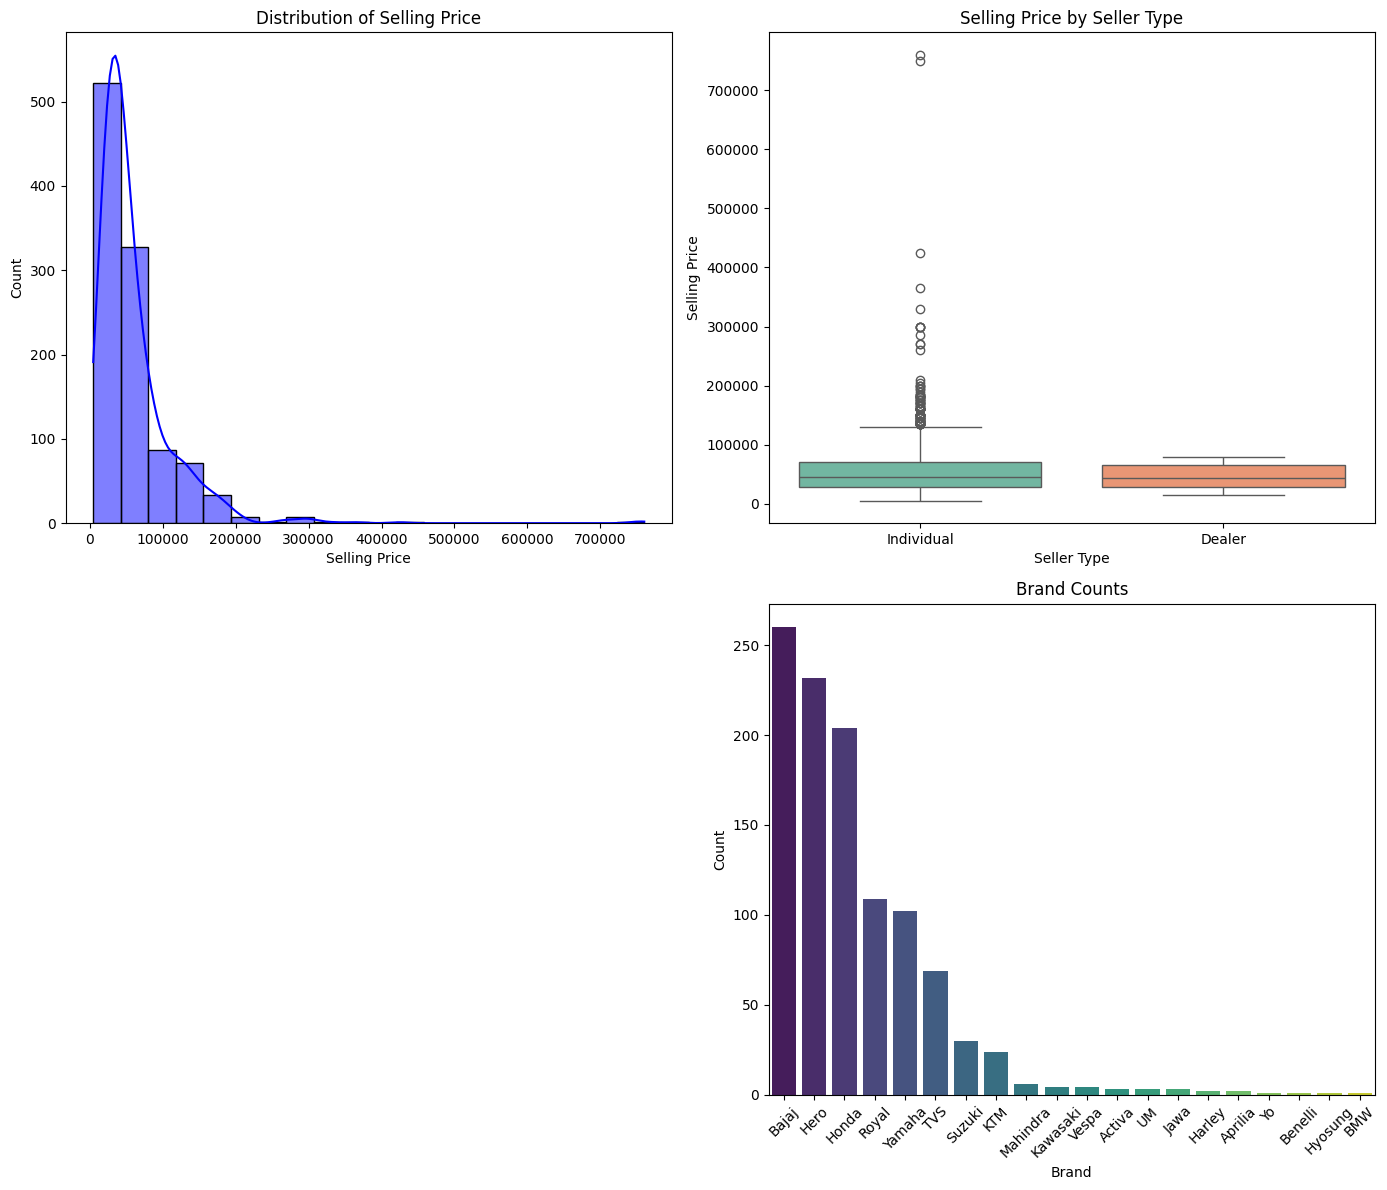

In [47]:
# Plotting
plt.figure(figsize=(14, 12))

# 1: Distribution of Selling_Price
plt.subplot(2, 2, 1)
sns.histplot(df['Selling_Price'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')

# 2: Boxplot of Selling_Price by Seller_Type
plt.subplot(2, 2, 2)
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df, palette='Set2')
plt.title('Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')

# 3: Barplot of Brand Counts
plt.subplot(2, 2, 4)
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Brand Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## **Data Preprocessing**

## **Define Target Variable (y) and Feature Variables (X)**

In [48]:
# Define X (features) and y (target variable)
X = df[['Year', 'Seller_Type', 'Owner', 'KM_Driven', 'Ex_Showroom_Price']]
y = df['Selling_Price']

## **Train Test Split**

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (848, 5)
X_test shape: (213, 5)
y_train shape: (848,)
y_test shape: (213,)


## **Modeling**

In [63]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 802282197.2997632
R-squared (R2) Score: 0.8783675678544633


## **Model Evaluation and prediction**

In [64]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample of Actual vs Predicted Values:")
print(results.head(10))


Sample of Actual vs Predicted Values:
     Actual     Predicted
448   65000  71965.910172
486   65000  63350.483995
215   14000   9471.793494
212   45000  50388.778697
481   65000  64942.324868
503   75000  83470.251344
163   40000  49004.610937
77    30000  31209.317157
528  100000  88561.325368
145   50000  43882.186271


## **Explaination**

Certainly! Here's an explanation of the Bike Price Prediction project based on the dataset provided:

### Predicting Car Selling Price Explanation

**Objective:**
The goal of this project is to predict the selling price of bikes based on various attributes such as the year of manufacture, ownership history, kilometers driven, and the ex-showroom price.

**Dataset Description:**
- **Brand**: The brand or manufacturer of the bike.
- **Model**: The specific model or variant of the bike.
- **Selling_Price**: The price at which the bike was sold.
- **Year**: The year in which the bike was manufactured.
- **Seller_Type**: The type of seller (e.g., Individual, Dealer).
- **Owner**: The number of previous owners of the bike.
- **KM_Driven**: The distance (in kilometers) the bike has been driven.
- **Ex_Showroom_Price**: The original price of the bike when it was new.

**Steps Involved:**

1. **Data Loading and Preprocessing:**
   - Load the dataset from the provided URL and handle any missing values (`dropna()` method).
   - Select relevant features (`X`) that could potentially influence the selling price (`Year`, `Owner`, `KM_Driven`, `Ex_Showroom_Price`).
   - Prepare the target variable (`y`) as the `Selling_Price`.

2. **Feature Engineering:**
   - Convert categorical variables (`Seller_Type`) into dummy variables using one-hot encoding (`pd.get_dummies()`).
   - This step ensures that categorical data is represented numerically, which is necessary for modeling.

3. **Train-Test Split:**
   - Split the dataset into training and testing sets (`train_test_split()` function).
   - This allows us to train the model on one subset of data and evaluate its performance on another, unseen subset.

4. **Model Selection and Training:**
   - Choose a suitable regression model for predicting numerical values. In this case, `LinearRegression()` is used, which assumes a linear relationship between the features and the target variable.
   - Fit the model to the training data (`model.fit(X_train, y_train)`), allowing it to learn the relationships between the features and the selling prices.

5. **Model Evaluation:**
   - Use evaluation metrics such as Mean Squared Error (MSE) and R-squared (R2) to assess how well the model performs on the test data (`mean_squared_error()`, `r2_score()`).
   - These metrics provide insights into how closely the predicted selling prices match the actual prices.

6. **Prediction:**
   - Finally, the model is used to predict selling prices for bikes in the test set (`model.predict(X_test)`).
   - This step demonstrates how well the trained model generalizes to new, unseen data.

**Conclusion:**
By completing these steps, the project aims to build a reliable machine learning model that can predict bike prices based on historical data. The model's accuracy and reliability can be further improved by experimenting with different regression algorithms, feature engineering techniques, and hyperparameter tuning.

This project not only provides insights into the factors influencing bike prices but also showcases the application of machine learning in predicting economic outcomes based on structured data.